本示例源于scikit-learn官方文档，为label propagation和SVM在鸢尾花数据集上的表现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.semi_supervised import label_propagation

In [2]:
# 获得数据
rng = np.random.RandomState(0)
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
# 对y标签进行随机性的unlabel
y_30 = np.copy(y)
y_30[rng.rand(len(y)) < 0.3]  = -1   
y_50 = np.copy(y)
y_50[rng.rand(len(y)) < 0.5]  = -1  

In [6]:
ls30 = (label_propagation.LabelPropagation().fit(X, y_30), y_30)
ls50 = (label_propagation.LabelPropagation().fit(X, y_50), y_50)
ls100 = (label_propagation.LabelPropagation().fit(X, y), y)
rbf_svc = (svm.SVC(kernel='rbf', gamma=5).fit(X, y), y)

In [7]:
# 进行mesh
h = 0.02  # step
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ['Label Spreading 30% data',
          'Label Spreading 50% data',
          'Label Spreading 100% data',
          'SVC with rbf kernel']

color_map = {-1: (1, 1, 1), 0: (0, 0, .9), 1: (1, 0, 0), 2: (.8, .6, 0)}

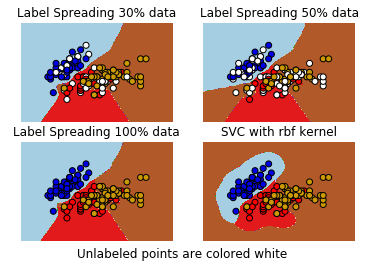

In [9]:
for i, (clf, y_train) in enumerate((ls30, ls50, ls100, rbf_svc)):
    plt.subplot(2, 2, i+1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis('off')
    
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:,0], X[:,1], c=colors, edgecolors='black')
    
    plt.title(titles[i])
plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()

In [14]:
# 测试准确性
from sklearn.metrics import accuracy_score
accuracy_score(y, ls30[0].predict(X))

0.8066666666666666

In [17]:
accuracy_score(y, ls50[0].predict(X))

0.8066666666666666

In [19]:
accuracy_score(y, rbf_svc[0].predict(X))

0.8333333333333334